Found 4 files belonging to 2 classes.
Clases encontradas: ['enfermas', 'sanas']


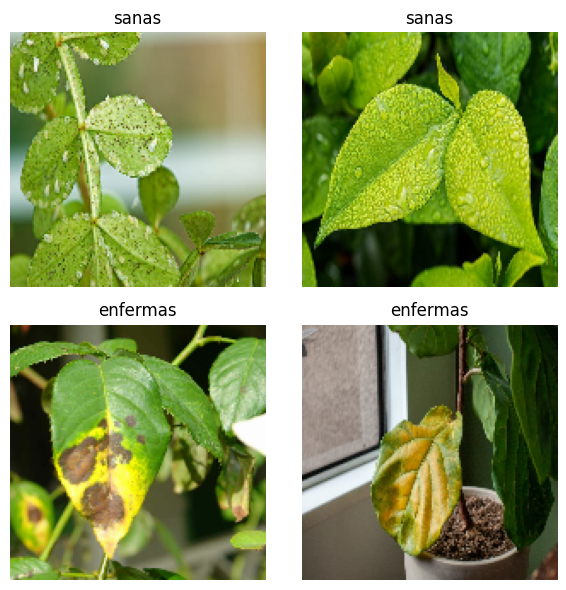

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6968
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5000 - loss: 1.2516
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7500 - loss: 0.2177
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7500 - loss: 0.2680
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0161


✅ Modelo guardado como cnn_mini_model.h5


In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Parámetros
dataset_path = "../data/raw/mini_dataset"
img_size = (150, 150)
batch_size = 4

# 2. Cargar dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    seed=42
)

# 3. Mostrar clases
class_names = dataset.class_names
print("Clases encontradas:", class_names)

# 4. Ver imágenes de ejemplo
plt.figure(figsize=(6, 6))
for images, labels in dataset.take(1):
    for i in range(len(images)):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()

# 5. Crear modelo CNN simple
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar
history = model.fit(dataset, epochs=5)

# 7. Guardar modelo
os.makedirs("../models", exist_ok=True)
model.save("../models/cnn_mini_model.h5")
print("✅ Modelo guardado como cnn_mini_model.h5")
